# **Lab 10: K-Nearest Neighbors II**
---

### **Description**
In this lab, you will review implementing KNN (K-Nearest Neighbors) models. You will also gain experience with feature scaling through standardization and normalization. You'll get to see firsthand how K-Folds Cross Validation aids in estimating the skill of ML models.

<br>

### **Structure**
**Part 1**: [Review](#p1)

**Part 2**: [Investigating Scaling](#p2)

**Part 3**: [K-Folds Cross Validation](#p3)

**Part 4**: [[OPTIONAL] Australia Dataset](#p4)






<br>

### **Learning Objectives**
By the end of this lab, we will:
* Understand how to implement KNN models with sklearn and different K values.
* Recognize how to evaluate KNN models in sklearn.

<br>

### **Resources**
* [K-Nearest Neighbors with sklearn](https://docs.google.com/document/d/1QltUCIlM0FOkalov1aPXOkOVQme3Ot1AUThiSUbh-kI/edit?usp=drive_link)


* [Feature Scaling and K-Folds Cross Validation with sklearn](https://docs.google.com/document/d/1XCYdpH4jtrbKtCQvNRQPKI5H_UWFg4LiPdZ4qabHmfo/edit?usp=drive_link)


* [pandas Commands](https://docs.google.com/document/d/1xnKJsii1AsRH2t22XtrAh7FzSFGqAR0hAmW4oLYM4MI/edit)


* [Data Visualizations with matplotlib](https://docs.google.com/document/d/1_3hzeIBPvcT6VC-eK-DDGVsKUvdVSvylNepoSLn2-T4/edit?usp=drive_link)

<br>

**Before starting, run the code below to import all necessary functions and libraries.**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets, model_selection, metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *

<a name="p1"></a>

---
## **Part 1: Review**
---

#### **Step \#1: Load in data**


The following dataset is the classic iris dataset that contains information about different types of iris flowers. It has some very nice structure that we can use to see KNN in action.

<br>

**NOTE**: We will be categorizing by `Type` in this case. The numbers correspond to these types of irises:

* 0 = Iris Setosa

* 1 = Iris Versicolour

* 2 = Iris Virginica

In [ ]:
iris_dataset = datasets.load_iris()
df = pd.DataFrame(data=iris_dataset.data, columns=iris_dataset.feature_names)
df['Type'] = iris_dataset.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### **Step \#2: Decide which features to base our classification on**

Decide which columns/variables you want to use to predict the class of flower. To simplify our **KNN** fitting we will just use two input variables: `petal length (cm)`	and `petal width (cm)`.

Since we are building a classifier it can be useful to look at some of the variables and color the scatter plot depending on the value of the target. Let's visualize this data in the cell below to see if there's any obvious correlation betwen the petal length, petal width, and the class of iris:

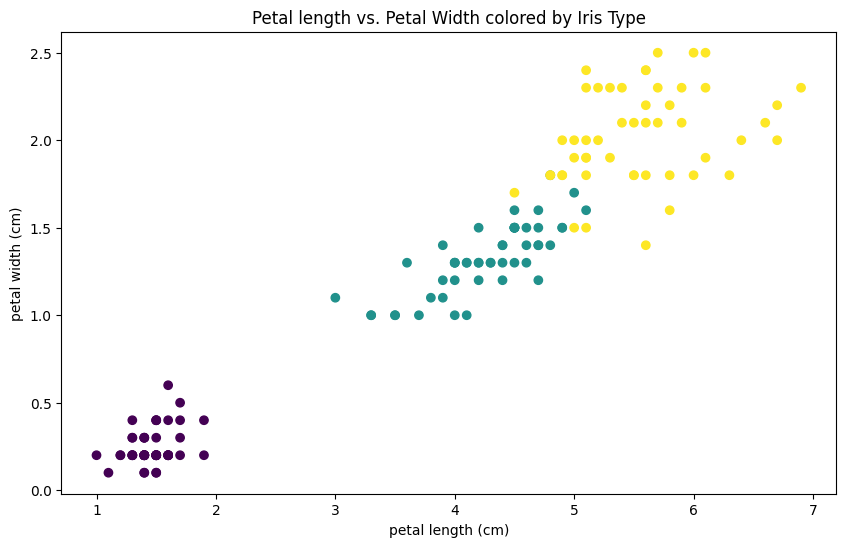

In [ ]:
petal_length = df["petal length (cm)"]
petal_width = df["petal width (cm)"]
iris_class = df["Type"]

plt.figure(figsize=(10,6))
plt.scatter(petal_length, petal_width, c = iris_class)

plt.title("Petal length vs. Petal Width colored by Iris Type")
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")

plt.show()

#### **Step \#3: Split data into training and testing data**



In [ ]:
# COMPLETE THIS CODE

##### **Solution**

In [ ]:
inputs = df[["petal length (cm)","petal width (cm)"]]
output = df[["Type"]]


X_train, X_test, y_train, y_test = model_selection.train_test_split(inputs, output, test_size=0.2, random_state=42)

#### **Step #4: Import the ML algorithm from sklearn**



In [ ]:
# COMPLETE THIS CODE

##### **Solution**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#### **Step #5: Initialize our model and set parameters**


Use a K value of 3.

In [ ]:
# COMPLETE THIS CODE

##### **Solution**

In [ ]:
model = KNeighborsClassifier(n_neighbors = 3)

#### **Step #6: Fit model on training set**


In [ ]:
# COMPLETE THIS CODE

##### **Solution**

In [ ]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

#### **Step \#7: Test the model**


In [ ]:
# COMPLETE THIS CODE

##### **Solution**

In [ ]:
pred = model.predict(X_test)

#### **Visualize your model's decision boundary**

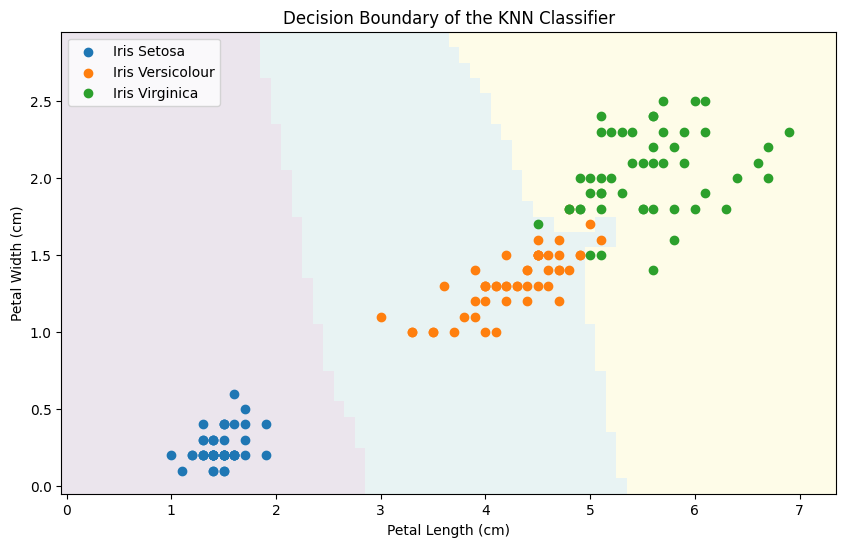

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))


feature_1 = df['petal length (cm)']
feature_2 = df['petal width (cm)']
labels = {0: 'Iris Setosa', 1: 'Iris Versicolour', 2: 'Iris Virginica'}

xx, yy = np.meshgrid(
    np.arange(0, feature_1.max() + 0.5, 0.1),
    np.arange(0, feature_2.max() + 0.5, 0.1))

z = model.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

ax.pcolormesh(xx, yy, z, alpha=0.1)

for label, data in df.groupby('Type'):
  ax.scatter(data['petal length (cm)'], data['petal width (cm)'],
  label=labels[label])

ax.set_title('Decision Boundary of the KNN Classifier')
ax.set_xlabel('Petal Length (cm)')
ax.set_ylabel('Petal Width (cm)')


ax.legend()
plt.show()

#### **Step #8: Make predictions**

Use your model to predict the type of iris for each of the following flowers:

1. We are given an iris with petal length `1.9` cm and petal width `0.25` cm.

2. Now, we are given an iris with petal length `6.5` cm and petal width `2.1` cm.

3. Lastly, we are given an iris with petal length `2.5` cm and petal width `0.9` cm.


<br>

**NOTE**: Recall that the type of irises are numbered as:
* 0 = Iris Setosa
* 1 = Iris Versicolour
* 2 = Iris Virginica

In [ ]:
mystery_iris = pd.DataFrame([[1.9, 0.25]], columns = ["petal length (cm)", "petal width (cm)"])

prediction = model.predict(mystery_iris)

print(prediction)

In [ ]:
# COMPLETE THIS CODE

In [ ]:
# COMPLETE THIS CODE

##### **Solution**

In [ ]:
mystery_iris = pd.DataFrame([[1.9, 0.25]], columns = ["petal length (cm)", "petal width (cm)"])

prediction = model.predict(mystery_iris)

print(prediction)

[0]


In [ ]:
mystery_iris = pd.DataFrame([[6.5, 2.1]], columns = ["petal length (cm)", "petal width (cm)"])

prediction = model.predict(mystery_iris)

print(prediction)

[2]


In [ ]:
mystery_iris = pd.DataFrame([[2.5, 0.9]], columns = ["petal length (cm)", "petal width (cm)"])

prediction = model.predict(mystery_iris)

print(prediction)

[1]


<a name="p2"></a>

---
## **Part 2: Investigating Scaling**
---

In this section, we will investigate the role that no scaling versus standardization versus normalization can have on a model's performance. Specifically, we will use a 5NN to predict the type of crop that will grow the most successfully in a given set of conditions.

**Run the cell below to load and view the data frame we will be using this section.**

In [ ]:
url = 'https://raw.githubusercontent.com/the-codingschool/TRAIN-datasets/main/crop%20recommendation%20clean.csv'
df = pd.read_csv(url)

df.head()

,nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


#### **Problem #2.1**

Define the features and label given that we are attempting to predict the type of crop based on environmental conditions.

In [ ]:
features = # COMPLETE THIS CODE
label = # COMPLETE THIS CODE

##### **Solution**

In [ ]:
features = df.drop(columns = 'crop')
label = df['crop']

#### **Problem #2.2**

Split the data into training and test sets such that 20% of the data is reserved for testing.

In [ ]:
X_train, X_test, y_train, y_test = # COMPLETE THIS CODE

##### **Solution**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)

#### **Problem #2.3**

Now, create a *standardized* version of the training and testing data using sklearn's `StandardScaler()`. We will use this to compare to the original training and test sets.

In [ ]:
std_scaler = StandardScaler()
X_train_std = std_scaler.# COMPLETE THIS CODE
X_test_std = std_scaler.# COMPLETE THIS CODE

##### **Solution**

In [ ]:
std_scaler = StandardScaler()
X_train_std = std_scaler.fit_transform(X_train)
X_test_std = std_scaler.transform(X_test)

#### **Problem #2.4**

Now, create a *normalized* version of the training and testing data using sklearn's `MinMaxScaler()`. We will use this to compare to the original training and test sets and to the standardized versions.

In [ ]:
norm_scaler = MinMaxScaler()
X_train_norm = norm_scaler.# COMPLETE THIS CODE
X_test_norm = norm_scaler.# COMPLETE THIS CODE

##### **Solution**

In [ ]:
norm_scaler = MinMaxScaler()
X_train_norm = norm_scaler.fit_transform(X_train)
X_test_norm = norm_scaler.transform(X_test)

#### **Problem #2.5**

Before moving onto modeling, let's see if we can visually detect any differences between these types of scaling. Specifically, create three scatter plots as follows:
1. One comparing the original training data's 0th column to the *standardized* data's 0th column.
2. Another comparing the original training data's 0th column to the *normalized* data's 0th column.
3. A third one comparing the *standardized* training data's 0th column to the *normalized* data's 0th column.

#### **1. Create a scatter plot comparing the original training data's 0th column to the *standardized* data's 0th column.**

**Run the code below to accomplish this task.**

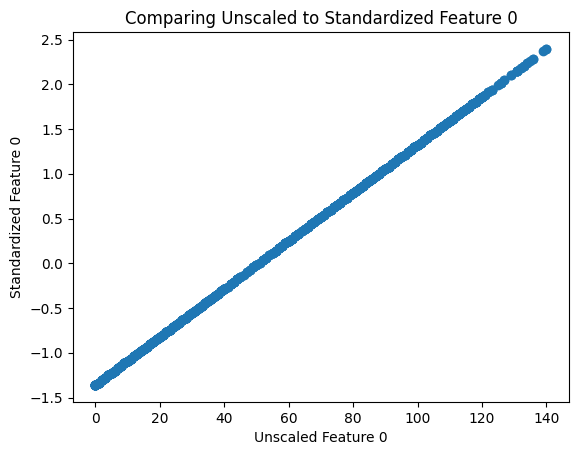

In [ ]:
plt.scatter(X_train.iloc[:, 0], X_train_std[:, 0])

plt.xlabel('Unscaled Feature 0')
plt.ylabel('Standardized Feature 0')
plt.title('Comparing Unscaled to Standardized Feature 0')

plt.show()

#### **2. Create a scatter plot comparing the original training data's 0th column to the *normalized* data's 0th column.**

In [ ]:
# COMPLETE THIS CODE

###### **Solution**

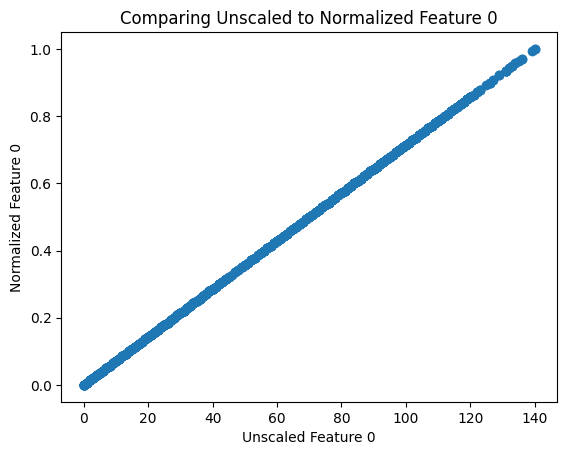

In [ ]:
plt.scatter(X_train.iloc[:, 0], X_train_norm[:, 0])

plt.xlabel('Unscaled Feature 0')
plt.ylabel('Normalized Feature 0')
plt.title('Comparing Unscaled to Normalized Feature 0')

plt.show()

#### **3. Create a scatter plot comparing the *standardized* data's 0th column to the *normalized* data's 0th column.**

In [ ]:
# COMPLETE THIS CODE

###### **Solution**

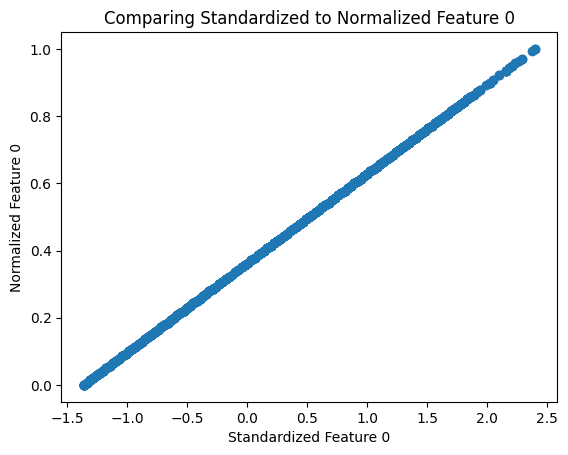

In [ ]:
plt.scatter(X_train_std[:, 0], X_train_norm[:, 0])

plt.xlabel('Standardized Feature 0')
plt.ylabel('Normalized Feature 0')
plt.title('Comparing Standardized to Normalized Feature 0')

plt.show()

#### **Problem #2.6**

**Discussion Questions**: Based on the visualizations above, does normalization or standardization seem to cause a larger change in the distribution of data or do they seem to have an equal effect? How might this affect a model's ability to make predictions?

##### **Solution**

The results are all pretty similar looking, so it's unlikely to make a huge difference in this case. It will come down to model performance.

#### **Problem #2.7**

Now it's time to model our data. Specifically, create KNN models as follows:

1. Modeling with the original, unscaled training data and testing on the test set using the accuracy and confusion matrix.

2. Modeling with the *standardized* training data and testing on the test set using the accuracy and confusion matrix.

3. Modeling with the *normalized* training data and testing on the test set using the accuracy and confusion matrix.

##### **1. Create a 5NN model with the original, unscaled training data and test it on the test set using a accuracy and confusion matrix.**

In [ ]:
model_unscaled = # COMPLETE LINE

model_unscaled.fit(# COMPLETE LINE


pred_unscaled = model_unscaled.# COMPLETE LINE

print(accuracy_score(y_test, pred_unscaled))

In [ ]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, pred_unscaled, display_labels = model_unscaled.classes_)

plt.show()

###### **Solution**

In [ ]:
model_unscaled = KNeighborsClassifier(n_neighbors = 5)

model_unscaled.fit(X_train, y_train)


pred_unscaled = model_unscaled.predict(X_test)

print(accuracy_score(y_test, pred_unscaled))

0.9704545454545455


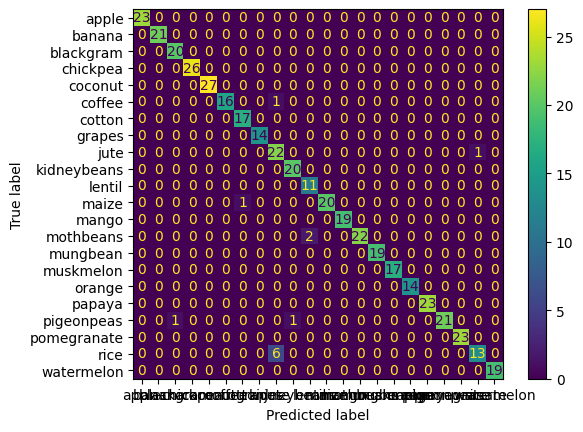

In [ ]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, pred_unscaled, display_labels = model_unscaled.classes_)

plt.show()

##### **2. Create a 5NN model with the *standardized* training data and test it on the test set using a accuracy and confusion matrix.**

In [ ]:
model_std = # COMPLETE THIS CODE

model_std.fit(# COMPLETE THIS CODE

pred_std =  # COMPLETE THIS CODE

print(accuracy_score(# COMPLETE THIS CODE

In [ ]:
# COMPLETE THIS CODE

###### **Solution**

In [ ]:
model_std = KNeighborsClassifier(n_neighbors = 5)

model_std.fit(X_train_std, y_train)

pred_std = model_std.predict(X_test_std)

print(accuracy_score(y_test, pred_std))

0.9568181818181818


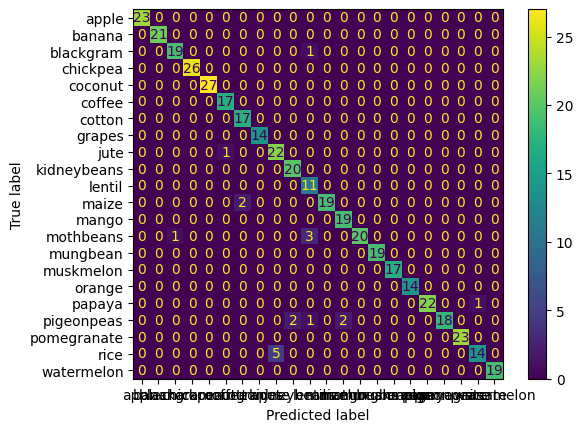

In [ ]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, pred_std, display_labels = model_std.classes_)

plt.show()

##### **3. Create a 5NN model with the *normalized* training data and test it on the test set using a accuracy and confusion matrix.**

In [ ]:
model_norm = # COMPLETE THIS CODE

# COMPLETE THIS CODE

In [ ]:
# COMPLETE THIS CODE

###### **Solution**

In [ ]:
model_norm = KNeighborsClassifier(n_neighbors = 5)

model_norm.fit(X_train_norm, y_train)

pred_norm = model_norm.predict(X_test_norm)

print(accuracy_score(y_test, pred_norm))

0.9681818181818181


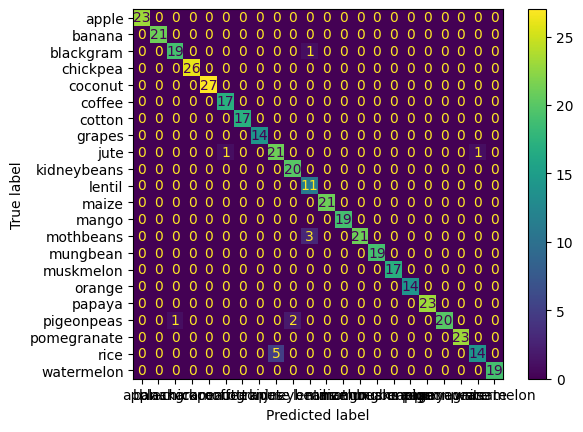

In [ ]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, pred_norm, display_labels = model_norm.classes_)

plt.show()

#### **Reflection questions**
Answer the following questions:

1. Which of the three models had the highest performance?

2. Which of the three models had the lowest performance?

3. For the highest performing model, what two classes did it struggle with the most according to the f1-score.

4. Using the confusion matrix, can you explain what the model may be struggling with for these two classes?

5. What might this struggle to identify these two classes reveal about them?

##### **Solution**

1. The model trained on standardized data performed the most highly, just a little better than the model trained on unscaled data.

2. The model trained on normalized data performed significantly worse than the other two models.

3. The highest performing model struggled most with `rice` and `jute` according to the f1-scores.

4. The confusion matrix shows that while the model seems to do well overall with these crops, it does have a tendency to misclassify `rice` as `jute`.

5. While this may be an issue from an ML perspective (our model misclassifying points), it actually offers a potentially interesting insight. In particular, the model may be struggling to distinguish these crops because they need very similar conditions to grow well. From a farmer's perspective, this is extremely helpful to know because they can perhaps grow both without having to create or work with multiple land and environment types.

<a name="p3"></a>

---
## **Part 3: K-Folds Cross Validation**
---

In this section, we will explore how to use K-Folds to evaluate and compare models before deciding on the final model we will use. Only once we have selected our final model should we evaluate it on the test set.

In particular, we will use K-Folds Cross Validation to determine the best model for several datasets.

#### **Problem #3.1**

To start, let's train and evaluate a 5NN model on the Iris dataset as usual. This is *bad practice*, but will help motivate why we should use cross validation.

In [ ]:
iris = load_iris()

features = iris.data
label = iris.target

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(features, label, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
knn_5 = KNeighborsClassifier(n_neighbors = # COMPLETE THIS CODE

knn_5.fit(# COMPLETE THIS CODE

pred = knn_5.predict(# COMPLETE THIS CODE

print(accuracy_score(# COMPLETE THIS CODE

##### **Solution**

In [ ]:
iris = load_iris()

features = iris.data
label = iris.target

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(features, label, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
knn_5 = KNeighborsClassifier(n_neighbors = 5)

knn_5.fit(X_train, y_train)

pred = knn_5.predict(X_test)

print(accuracy_score(y_test, pred))

#### **Problem #3.2**

Now, let's take the proper and more insightful approach: evaluating the model using K-Folds Cross Validation. Complete the code below to evaluate a 5NN model using 10-Folds Cross Validation.

In [ ]:
knn_5 = KNeighborsClassifier(n_neighbors = 5)

scores_5 = cross_val_score(knn_5, X_train, y_train, cv = # COMPLETE THIS CODE
print("10-Folds CV Scores: " + str(scores_5.mean()) + " +/- " + str(scores_5.std()))

##### **Solution**

In [ ]:
knn_5 = KNeighborsClassifier(n_neighbors = 5)

scores_5 = cross_val_score(knn_5, X_train, y_train, cv=10)
print("10-Folds CV Scores: " + str(scores_5.mean()) + " +/- " + str(scores_5.std()))

10-Folds CV Scores: 0.9333333333333333 +/- 0.07264831572567787


#### **Visualize the scores by running the cell below.**

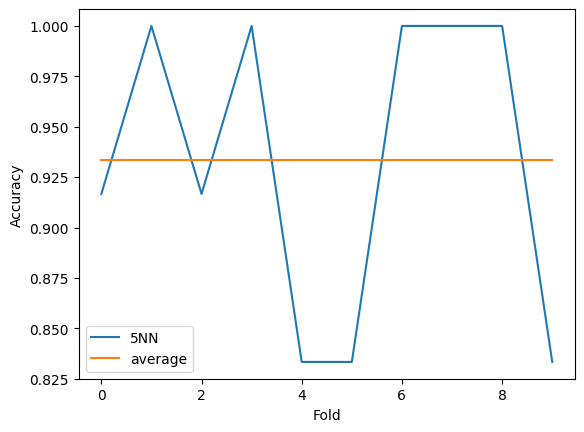

In [ ]:
plt.plot(scores_5, label = '5NN')
plt.plot([scores_5.mean() for i in range(10)], label = 'average')

plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

#### **Problem #3.3**

Now, use 10-Folds Cross Validation to evaluate and compare to the following models:
1. 1NN
2. 11NN (**NOTE**: $\sqrt{\text{length of training data}} \approx 11$)
3. 99NN


<br>

**NOTE**: There is code at the end that will visualize all of these results together.


##### **1. 1NN**

In [ ]:
knn_1 = KNeighborsClassifier(# COMPLETE THIS CODE

scores_1 = cross_val_score(# COMPLETE THIS CODE
print("10-Folds CV Scores: " + str(scores_1.mean()) + " +/- " + str(scores_1.std()))

###### **Solution**

In [ ]:
knn_1 = KNeighborsClassifier(n_neighbors = 1)

scores_1 = cross_val_score(knn_1, X_train, y_train, cv=10)
print("10-Folds CV Scores: " + str(scores_1.mean()) + " +/- " + str(scores_1.std()))

10-Folds CV Scores: 0.9416666666666667 +/- 0.08374896350934075


##### **2. 11NN (**NOTE**: $\sqrt{\text{length of training data}} \approx 11$)**

In [ ]:
knn_11 = # COMPLETE THIS CODE

# COMPLETE THIS CODE

###### **Solution**

In [ ]:
knn_11 = KNeighborsClassifier(n_neighbors = 11)

scores_11 = cross_val_score(knn_11, X_train, y_train, cv=10)
print("10-Folds CV Scores: " + str(scores_11.mean()) + " +/- " + str(scores_11.std()))

10-Folds CV Scores: 0.9583333333333333 +/- 0.05590169943749474


##### **3. 99NN**

In [ ]:
knn_99 = # COMPLETE THIS CODE

# COMPLETE THIS CODE

###### **Solution**

In [ ]:
knn_99 = KNeighborsClassifier(n_neighbors = 99)

scores_99 = cross_val_score(knn_99, X_train, y_train, cv=10)
print("10-Folds CV Scores: " + str(scores_99.mean()) + " +/- " + str(scores_99.std()))

10-Folds CV Scores: 0.4 +/- 0.08975274678557509


#### **Visualize the scores by running the cell below.**

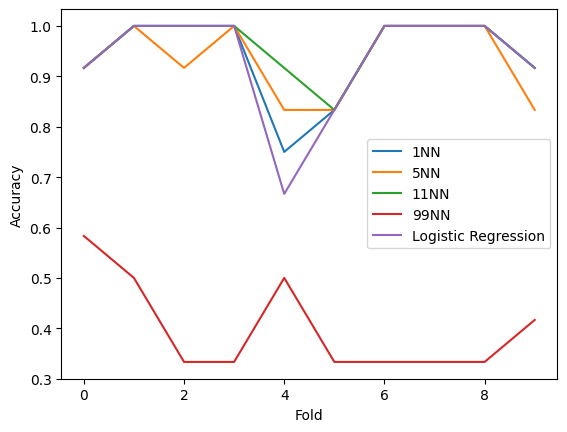

In [ ]:
plt.plot(scores_1, label = '1NN')
plt.plot(scores_5, label = '5NN')
plt.plot(scores_11, label = '11NN')
plt.plot(scores_99, label = '99NN')

plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

#### **Problem #3.4**

Assuming we do not plan to try out any other models, we can safely train our final model and evaluate it on the test set. Consider the average, standard deviation, and individual scores we visualized to pick one of the models from above and:
* Train it on the entire training set.
* Evaluate it on the test set with a accuracy.


##### **Solution**

In [ ]:
model = KNeighborsClassifier(n_neighbors = 11)

model.fit(X_train, y_train)

pred = model.predict(X_test)

print(accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



#### **Reflection questions**
Answer the following questions:

1. Which of the five models had the highest performance during cross validation?

2. Which of the five models had the lowest performance during cross validation?

3. How do the top performing model's cross validation metrics compare to the test metrics? In other words, how does this model perform in Problem #3.3 versus #3.4?

##### **Solution**

1. The 11NN model had the highest performance during cross validation.

2. The 99NN mode had the worst performance by far during the cross validation.

3. The 11NN model had an accuracy of roughly 0.9583 +/- 0.056 during cross validation, but 1.0 accuracy (and all other metrics) during testing. This is a great example of how much more insight cross validation can provide. It is often a much needed reality check and a number that will gain much more respect from the community than just the test metrics.

<a name="p4"></a>

---
## **Part 4: [OPTIONAL] Australia Dataset**
---
#### **About the Dataset**
Weather, and humans' ability to forecast/predict it plays a large role in many aspects of daily life. This dataset contains about 10 years of daily weather observations from numerous Australian weather stations.

The features are as follows:
* `Location`: the location of the weather station
* `WindSpeed`: the wind speed averaged over 10 minutes prior to 9am (in km/hr)
* `Humidity`: the humidity (percent) at 9am
* `Pressure`: atmospheric pressure reduced to mean sea level at 9am (in hundreds of hPa)
* `Temp`: temperature at 9am (in Celsius)
* `RainToday`: whether or not the rain/precipitation in the 24 hours to 9am exceeds 1mm (0: no, 1: yes)
* `RainTomorrow`: whether or not it rained at least 1mm the next day (0: no, 1: yes)

<br>

#### **Your Task**
* Build a model that can predict whether or not it will rain tomorrow.
* Build another model with the optimal hyperparameters and compare the accuracies.


<br>

**Run the code below before continuing.**

In [ ]:
url = "https://raw.githubusercontent.com/the-codingschool/TRAIN/main/australia/australia_weather.csv"
australia_df = pd.read_csv(url)
australia_df.head(10)

,Location,WindSpeed,Humidity,Pressure,Temp,RainToday,RainTomorrow
0,Albury,20,71,10.077,16.9,0,0
1,Albury,4,44,10.106,17.2,0,0
2,Albury,7,82,10.108,17.8,0,0
3,Albury,19,55,10.092,20.6,0,0
4,Albury,6,48,10.134,16.3,0,0
5,Albury,15,58,10.070,20.1,1,0
6,Albury,17,48,10.118,20.4,0,1
7,Albury,15,89,10.105,15.9,1,1
8,Albury,24,65,10.012,15.8,1,0
9,Albury,11,69,10.122,17.2,0,1


#### **Problem #4.1**

Create a KNN model with the hyperparameter `n_neighbors = 3` in order to predict whether or not it will rain tomorrow. Use all features except `Location` and `RainTomorrow`, and then train and evaluate the model using `accuracy_score` and the confusion matrix.

In [ ]:
features = # COMPLETE THIS CODE
label = # COMPLETE THIS CODE

# COMPLETE THIS CODE

##### **Solution**

In [ ]:
features = australia_df.drop(['Location', 'RainTomorrow'], axis=1)
label = australia_df['RainTomorrow']

#split the train and test data
X_train, X_test, y_train, y_test = model_selection.train_test_split(features, label, test_size=0.2, random_state=42)

# import the KNN algorithm
from sklearn.neighbors import KNeighborsClassifier

# initialize
model = KNeighborsClassifier(n_neighbors = 3)

# fit
model.fit(X_train, y_train)

# predict
pred = model.predict(X_test)

# Evaluation of accuracy
print("Accuracy Score: " + str(metrics.accuracy_score(y_test, pred)))

Accuracy Score: 0.7573831355121786


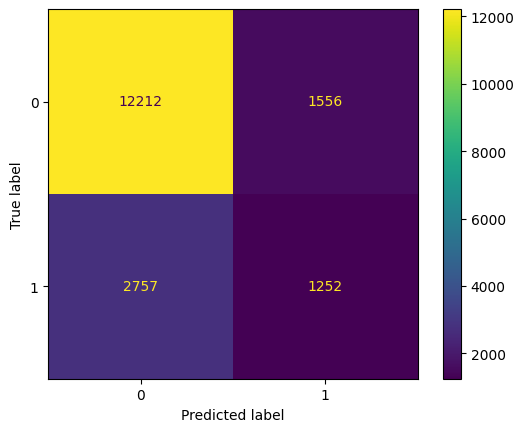

In [ ]:
metrics.ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

#### **Reflection questions**
Answer the following questions:

1. Do you think this model is useful?
2. Can you think of a real world application for this model?

#### **Problem #4.2**

Using the same features and train/test split, determine the best value of K between 1 - 100.

**NOTE**: $\sqrt{\text{number training data points}} ≈ 265$). However, it will take the computer a long time to train that many models.

##### **Solution**


{1: 70.95685436237835, 3: 75.73831355121786, 5: 77.13899983124261, 7: 77.90965854756145, 9: 78.18529560668279, 11: 78.44405692749058, 13: 78.59593857231253, 15: 78.59031332620802, 17: 78.71406874050739, 19: 78.70281824829837, 21: 78.79844743207516, 23: 78.79844743207516, 25: 78.80407267817966, 27: 78.92220284637453, 29: 78.95032907689712, 31: 78.98408055352422, 33: 78.89970186195646, 35: 78.89970186195646, 37: 78.87157563143387, 39: 78.92782809247905, 41: 78.83782415480677, 43: 78.88282612364291, 45: 78.89407661585194, 47: 78.97283006131518, 49: 78.96157956910615, 51: 78.87720087753839, 53: 78.88845136974743, 55: 78.94470383079259, 57: 78.93907858468808, 59: 78.97283006131518, 61: 78.99533104573325, 63: 79.02908252236035, 65: 79.06283399898746, 67: 79.04033301456938, 69: 79.15283793665972, 71: 79.16408842886877, 73: 79.09096022951005, 75: 79.00658153794228, 77: 79.08533498340552, 79: 79.079709737301, 81: 79.09658547561456, 83: 79.08533498340552, 85: 79.09658547561456, 87: 79.0965854756

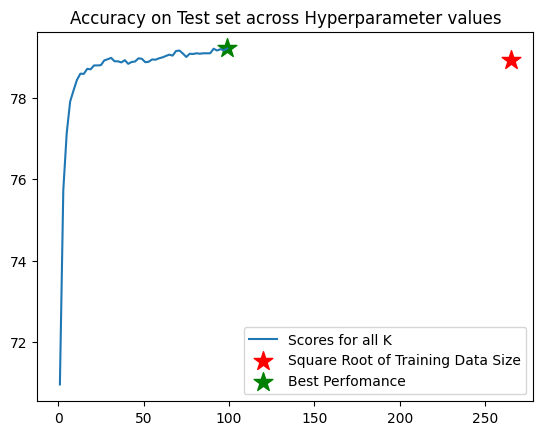

Top score of optimal classifier: 79.21471564380941
Best Value of N to use 99


In [ ]:
# Hyperparameter tuning
scores = {}
for n in range(1, 100, 2):
    full_model = KNeighborsClassifier(n_neighbors = n)
    full_model.fit(X_train, y_train.to_numpy().reshape(-1))
    pred = full_model.predict(X_test)
    score = sum(pred == y_test.to_numpy().reshape(-1))/len(pred)* 100
    scores[n] = score


plt.title("Accuracy on Test set across Hyperparameter values")
print(scores)
plt.plot(list(scores.keys()), list(scores.values()), label = 'Scores for all K')

# ADDING THE PERFORMANCE FOR K = SQRT SIZE FOR REFERENCE
k = int(len(X_train)**(1/2)/2)*2 - 1
full_model = KNeighborsClassifier(n_neighbors = k)
full_model.fit(X_train, y_train.to_numpy().reshape(-1))
pred = full_model.predict(X_test)
score = sum(pred == y_test.to_numpy().reshape(-1))/len(pred)* 100
plt.scatter([k], [score], color = 'r', marker = '*', s = 200, label = 'Square Root of Training Data Size')


top_score = max(scores.values())
best_k = list(scores.keys())[list(scores.values()).index(top_score)]
plt.scatter([best_k], [top_score], color = 'g', marker = '*', s = 200, label = 'Best Perfomance')

plt.legend()
plt.show()



# PRINTING THE RESULTS
print("Top score of optimal classifier: " + str(top_score))
print("Best Value of N to use " + str(best_k))

{100: 79.22596613601846, 102: 79.15283793665972, 104: 79.13033695224166, 106: 79.14721269055521, 108: 79.09658547561456, 110: 79.10783596782359, 112: 79.1134612139281, 114: 79.02345727625584, 116: 78.97845530741971, 118: 79.00658153794228, 120: 79.01783203015131, 122: 79.079709737301, 124: 79.05720875288293, 126: 79.05720875288293, 128: 79.08533498340552, 130: 79.05720875288293, 132: 79.10221072171908, 134: 79.06845924509197, 136: 79.1134612139281, 138: 79.11908646003263, 140: 79.079709737301, 142: 79.1134612139281, 144: 79.11908646003263, 146: 79.11908646003263, 148: 79.06845924509197, 150: 79.03470776846487, 152: 79.01783203015131, 154: 78.98408055352422, 156: 78.98970579962872, 158: 78.96720481521066, 160: 78.98970579962872, 162: 78.98408055352422, 164: 78.97845530741971, 166: 78.95032907689712, 168: 78.96720481521066, 170: 79.00658153794228, 172: 78.97283006131518, 174: 78.95595432300163, 176: 78.93345333858356, 178: 78.93907858468808, 180: 78.95595432300163, 182: 78.95032907689712

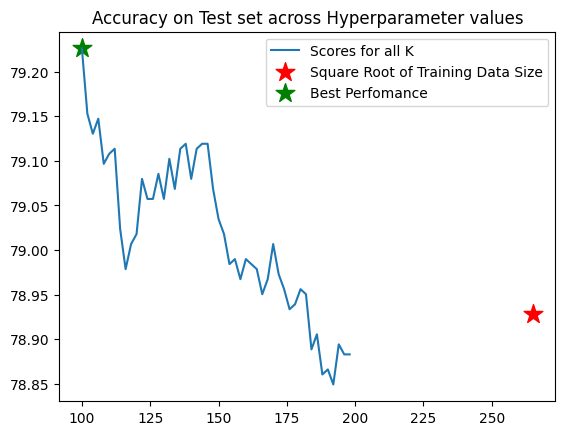

Top score of optimal classifier: 79.22596613601846
Best Value of N to use 100


In [ ]:
# Hyperparameter tuning
scores = {}
for n in range(100, 200, 2):
    full_model = KNeighborsClassifier(n_neighbors = n)
    full_model.fit(X_train, y_train.to_numpy().reshape(-1))
    pred = full_model.predict(X_test)
    score = sum(pred == y_test.to_numpy().reshape(-1))/len(pred)* 100
    scores[n] = score


plt.title("Accuracy on Test set across Hyperparameter values")
print(scores)
plt.plot(list(scores.keys()), list(scores.values()), label = 'Scores for all K')

# ADDING THE PERFORMANCE FOR K = SQRT SIZE FOR REFERENCE
k = int(len(X_train)**(1/2)/2)*2 - 1
full_model = KNeighborsClassifier(n_neighbors = k)
full_model.fit(X_train, y_train.to_numpy().reshape(-1))
pred = full_model.predict(X_test)
score = sum(pred == y_test.to_numpy().reshape(-1))/len(pred)* 100
plt.scatter([k], [score], color = 'r', marker = '*', s = 200, label = 'Square Root of Training Data Size')


top_score = max(scores.values())
best_k = list(scores.keys())[list(scores.values()).index(top_score)]
plt.scatter([best_k], [top_score], color = 'g', marker = '*', s = 200, label = 'Best Perfomance')

plt.legend()
plt.show()



# PRINTING THE RESULTS
print("Top score of optimal classifier: " + str(top_score))
print("Best Value of N to use " + str(best_k))

{200: 78.87157563143387, 202: 78.86595038532936, 204: 78.82657366259774, 206: 78.87720087753839, 208: 78.87157563143387, 210: 78.9109523541655, 212: 78.92782809247905, 214: 78.91657760027002, 216: 78.90532710806097, 218: 78.91657760027002, 220: 78.92220284637453, 222: 78.89970186195646, 224: 78.93345333858356, 226: 78.89407661585194, 228: 78.90532710806097, 230: 78.89407661585194, 232: 78.87157563143387, 234: 78.88845136974743, 236: 78.87157563143387, 238: 78.89970186195646, 240: 78.92220284637453, 242: 78.9109523541655, 244: 78.89407661585194, 246: 78.88282612364291, 248: 78.87720087753839, 250: 78.9109523541655, 252: 78.92220284637453, 254: 78.89407661585194, 256: 78.9109523541655, 258: 78.9109523541655, 260: 78.90532710806097, 262: 78.90532710806097, 264: 78.92782809247905, 266: 78.93907858468808, 268: 78.9109523541655, 270: 78.92782809247905, 272: 78.95032907689712, 274: 78.92782809247905, 276: 78.93345333858356, 278: 78.89407661585194, 280: 78.92220284637453, 282: 78.9222028463745

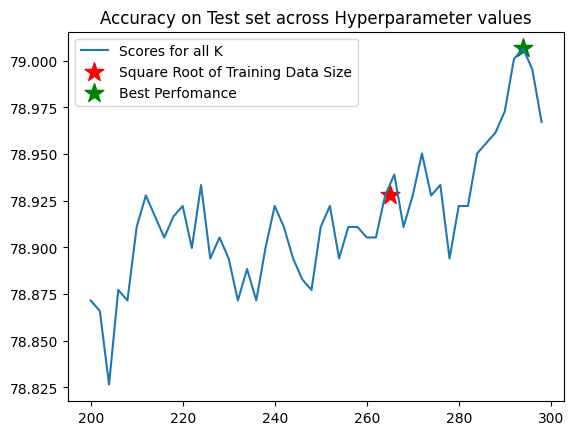

Top score of optimal classifier: 79.00658153794228
Best Value of N to use 294


In [ ]:
# Hyperparameter tuning
scores = {}
for n in range(200, 300, 2):
    full_model = KNeighborsClassifier(n_neighbors = n)
    full_model.fit(X_train, y_train.to_numpy().reshape(-1))
    pred = full_model.predict(X_test)
    score = sum(pred == y_test.to_numpy().reshape(-1))/len(pred)* 100
    scores[n] = score


plt.title("Accuracy on Test set across Hyperparameter values")
print(scores)
plt.plot(list(scores.keys()), list(scores.values()), label = 'Scores for all K')

# ADDING THE PERFORMANCE FOR K = SQRT SIZE FOR REFERENCE
k = int(len(X_train)**(1/2)/2)*2 - 1
full_model = KNeighborsClassifier(n_neighbors = k)
full_model.fit(X_train, y_train.to_numpy().reshape(-1))
pred = full_model.predict(X_test)
score = sum(pred == y_test.to_numpy().reshape(-1))/len(pred)* 100
plt.scatter([k], [score], color = 'r', marker = '*', s = 200, label = 'Square Root of Training Data Size')


top_score = max(scores.values())
best_k = list(scores.keys())[list(scores.values()).index(top_score)]
plt.scatter([best_k], [top_score], color = 'g', marker = '*', s = 200, label = 'Best Perfomance')

plt.legend()
plt.show()



# PRINTING THE RESULTS
print("Top score of optimal classifier: " + str(top_score))
print("Best Value of N to use " + str(best_k))

##### **Solution**

1. Yes, because it can give a general idea of whether or not it is likely to rain, although it does not suggest how much rain.

2. Weather app, news station, farmers, airlines.

---

# End of Notebook

© 2023 The Coding School, All rights reserved